In [11]:
from sklearn import datasets, tree, model_selection
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
k = 10

In [12]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
lf = tree.DecisionTreeClassifier(random_state=1)

In [13]:
answer1 = model_selection.cross_val_score(lf, X, y, cv = k).mean()
print answer1

0.8308624439503834


In [14]:
bagging_est =  BaggingClassifier(base_estimator = lf, n_estimators = 100)
answer2 = model_selection.cross_val_score(bagging_est, X, y, cv = k).mean()
print answer2

0.9271376673494556


In [99]:
for i in np.arange(10, 100, 10):
    bagging_est =  BaggingClassifier(base_estimator = lf, n_estimators = i)
    print('n_estimators=',i)
    print('quality=', model_selection.cross_val_score(bagging_est, X, y, cv = k).mean())
    print
    

('n_estimators=', 10)
('quality=', 0.9032094532105901)

('n_estimators=', 20)
('quality=', 0.9167153757772933)

('n_estimators=', 30)
('quality=', 0.9132913584425676)

('n_estimators=', 40)
('quality=', 0.924963914317044)

('n_estimators=', 50)
('quality=', 0.9243651424258766)

('n_estimators=', 60)
('quality=', 0.9288603143972998)

('n_estimators=', 70)
('quality=', 0.9248561359069702)

('n_estimators=', 80)
('quality=', 0.9210280205545935)

('n_estimators=', 90)
('quality=', 0.9243849688503192)



In [15]:
max_features = int(np.sqrt(X.shape[1]))
bagging_est =  BaggingClassifier(base_estimator = lf, n_estimators = 100, max_features = max_features)
answer3 = model_selection.cross_val_score(bagging_est, X, y, cv = k).mean()
print answer3

0.9314939383837462


In [16]:
max_features = int(np.sqrt(X.shape[1]))
lf = tree.DecisionTreeClassifier(random_state=1, max_features = max_features)
bagging_est =  BaggingClassifier(base_estimator = lf, n_estimators = 100)#, max_features = max_features)
answer4 = model_selection.cross_val_score(bagging_est, X, y, cv = k).mean()
print answer4

0.9449758452640349


In [7]:
max_features = int(np.sqrt(X.shape[1]))
lf = tree.DecisionTreeClassifier(random_state=1, max_features = max_features)
rtc_est =  RandomForestClassifier(n_estimators = 100, max_features = max_features)
answer5 = model_selection.cross_val_score(rtc_est, X, y, cv = k).mean()
print answer5

0.9522019275560446


Populating the interactive namespace from numpy and matplotlib


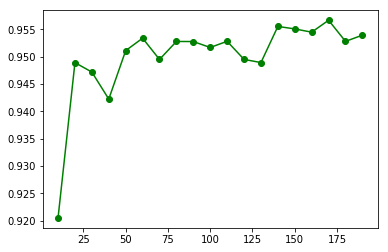

In [103]:
#5.1
%pylab inline
lf = tree.DecisionTreeClassifier(random_state=1, max_features = max_features)
x = []
y_t = []
for estimators in np.arange(10, 200, 10):
    rtc_est =  RandomForestClassifier(n_estimators = estimators, max_features = max_features)
    y_t.append(model_selection.cross_val_score(rtc_est, X, y, cv = k).mean())
    x.append(estimators)
pylab.plot(x, y_t, 'g-', marker='o', label='train')

Populating the interactive namespace from numpy and matplotlib


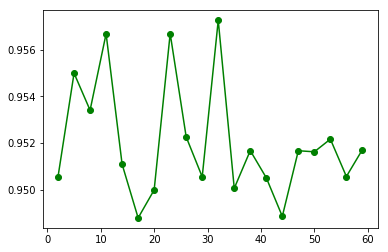

In [8]:
#5.2
%pylab inline
x = []
y_t = []
for features in np.arange(2, 60, 3):
    lf = tree.DecisionTreeClassifier(random_state=1, max_features = features)
    rtc_est =  RandomForestClassifier(n_estimators = 100, max_features = max_features)
    y_t.append(model_selection.cross_val_score(rtc_est, X, y, cv = k).mean())
    x.append(features)
pylab.plot(x, y_t, 'g-', marker='o', label='train')

Populating the interactive namespace from numpy and matplotlib


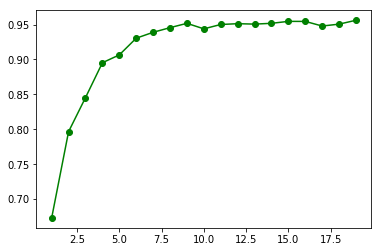

In [22]:
%pylab inline
lf = tree.DecisionTreeClassifier(random_state=1, max_features = max_features)
x = []
y_t = []
for depth in range(1, 20):
    rtc_est =  RandomForestClassifier(n_estimators = 100, max_features = max_features, max_depth = depth)
    y_t.append(model_selection.cross_val_score(rtc_est, X, y, cv = k).mean())
    x.append(depth)
pylab.plot(x, y_t, 'g-', marker='o', label='train')


In [23]:

rtc_est =  RandomForestClassifier(n_estimators = 100, max_features = max_features)
print model_selection.cross_val_score(rtc_est, X, y, cv = k).mean()

0.9500014350421908


In [24]:
answer5 = [2, 3, 4, 7]
print answer1
print answer2
print answer3
print answer4
print answer5

0.8308624439503834
0.9271376673494556
0.9314939383837462
0.9449758452640349
[2, 3, 4, 7]
